In [122]:
import numpy as np
import matplotlib.pyplot as pp
import math



## Task A: Interpolation over a triangle: nearest neighbour method

In [123]:
def TrNN(r,f,rp):
    w1 = 1/math.sqrt((r[0][0] - rp[0])**2 + (r[0][1] - rp[1])**2)
    w2 = 1/math.sqrt((r[1][0] - rp[0])**2 + (r[1][1] - rp[1])**2)
    w3 = 1/math.sqrt((r[2][0] - rp[0])**2 + (r[2][1] - rp[1])**2)
    
    fp = (w1*f[0] + w2*f[1] + w3*f[2]) / (w1+w2+w3)
    
    return fp
    
    
    
    
    
    
    
    
    
    

0.4283745086941787


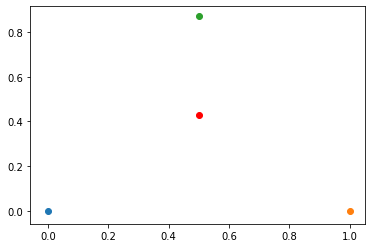

In [124]:
x1 = 0
y1 = 0
x2 = 1
y2 = 0
x3 = 0.5
y3 = 0.87
r = [[x1,y1],[x2,y2],[x3,y3]]

f1 = -2
f2 = 2
f3 = 1
f = [f1,f2,f3]

x4 = 0.5
y4 = 0.43

rp = [x4,y4]


print(TrNN(r,f,rp))


pp.scatter(x1,y1)
pp.scatter(x2,y2)
pp.scatter(x3,y3)
pp.scatter(x4,y4, color="red")



## Task B: Interpolation over a triangle: barycentric coordinates

In [125]:
def TrBaryc(r,f,rp):
    l1 = ((r[1][1]-r[2][1]) * (rp[0]-r[2][0]) + (r[2][0]-r[1][0])*(rp[1]-r[2][1])) / ((r[1][1]-r[2][1]) * (r[0][0]-r[2][0]) + (r[2][0]-r[1][0])*(rp[1]-r[2][1]))
    l2 = ((r[2][1]-r[0][1]) * (rp[0]-r[2][0]) + (r[0][0]-r[2][0])*(rp[1]-r[2][1])) / ((r[1][1]-r[2][1]) * (r[0][0]-r[2][0]) + (r[2][0]-r[1][0])*(rp[1]-r[2][1]))
    l3 = 1-l2-l1
    
    fp = l1*f[0] + l2*f[1] + l3*f[2]
    #print(l1 +l2 +l3)
    
    return fp
    

0.3282442748091603


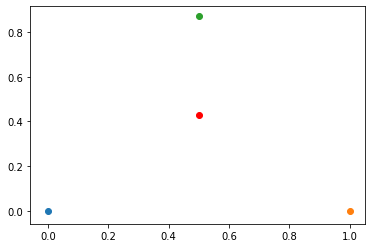

In [126]:
x1 = 0
y1 = 0
x2 = 1
y2 = 0
x3 = 0.5
y3 = 0.87
r = [[x1,y1],[x2,y2],[x3,y3]]

f1 = -2
f2 = 2
f3 = 1
f = [f1,f2,f3]

x4 = 0.5
y4 = 0.43

rp = [x4,y4]


print(TrBaryc(r,f,rp))


pp.scatter(x1,y1)
pp.scatter(x2,y2)
pp.scatter(x3,y3)
pp.scatter(x4,y4, color="red")

## Task C: Interpolation over a triangulated mesh and mesh refinement

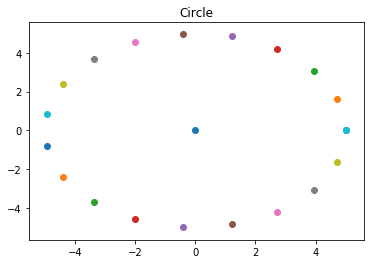

In [132]:
# generate points in a circle
def PointsInCircum(r,n=100):
    n -=1
    pi = math.pi
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]


# define N and radius
N = 20
r = 500

points = PointsInCircum(5,N)
points = points + [(0,0)] # add centerpoint


#plot circle points
for i in range(0,len(points)):
    pp.scatter(points[i][0], points[i][1])
    
pp.title("Circle")
    
# assign values for each point  
f = [(360/N*i) for i in range (0,N+1)]


In [133]:
cornerlist = [(i,i+1,N) for i in range(0,49) ]
cornerlist = cornerlist + [(N-1,0,N)]
#cornerlist

In [134]:
newNodes = []

for i in range(0,len(cornerlist)):
    p0, p1, p2 = cornerlist[i][0],cornerlist[i][1],cornerlist[i][2] 
    x0, x1, x2 = points[p0][0], points[p1][0], points[p2][0]
    y0, y1, y2 = points[p0][1], points[p1][1], points[p2][1]
    xnew = (x0 + x1 + x2)/3
    ynew = (y0 + y1 + y2)/3
    newNodes = newNodes + [(xnew,ynew)]
    


IndexError: list index out of range

IndexError: list index out of range

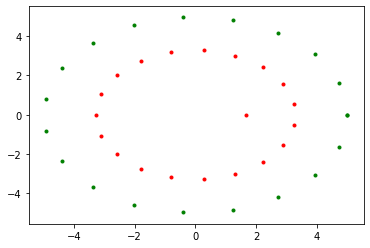

In [135]:
for i in range(0,len(newNodes)):
    pp.scatter(points[i][0], points[i][1], marker=".",color='g')
    pp.scatter(newNodes[i][0], newNodes[i][1],marker=".",color='r')
pp.scatter(points[50][0], points[50][1],marker=".",color='g', linewidth=1)
pp.grid()



In [137]:
for i in range(0,N-1):
    # point at which we want the value
    rp = newNodes[i]
    # coordinates of corners to input
    p0, p1, p2 = cornerlist[i][0],cornerlist[i][1],cornerlist[i][2] 
    x0, x1, x2 = points[p0][0], points[p1][0], points[p2][0]
    y0, y1, y2 = points[p0][1], points[p1][1], points[p2][1]
    # values of the points
    fpoints = [f[p0], f[p1], f[p2]]
    rpoints = [[x0,y0],[x1,y1],[x2,y2]]
    value = TrBaryc(rpoints,fpoints,rp)
    print(value)

18.258255180187682
144.1527698302878
187.82491199932988
191.86886877220792
157.85322018371605
46.88546895118881
-320.4303179540708
-1122.166036027441
-320.5119434030463
107.99999999999986
228.58759197289908
271.32760320588284
286.7785001323582
287.15618043905624
271.05084696656604
218.43181556052366
62.48875716283601
115.12617698483109
306.00000000000006


(3.3333333333333335, -4.082155997157844e-16)